In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
from torchvision import transforms

from npair_dataset import FramePairsDataset
from npair_sampler import VideoFrameSampler
import simclr_transforms

In [3]:
root_directory = '../../data/moving_mnist/imgs_train'

transform = transforms.Compose([
    #simclr_transforms.get_color_distortion(.1),
    simclr_transforms.RandomGaussianBluring(5, 1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])



dataset = FramePairsDataset(root_directory, '.npy', distance=10, transform=transform)
npairsampler = VideoFrameSampler(len(dataset), 100, 100)
data_loader = torch.utils.data.DataLoader(dataset, batch_size=10, sampler=npairsampler)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


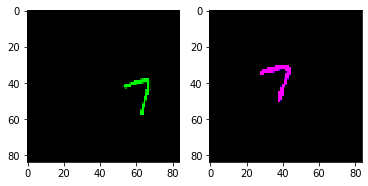

In [4]:
def test_data_loader(data_loader):
    batch = iter(data_loader).next()
    anchor_frames = batch[0]
    positive_frames = batch[1]
    anchor_frames = anchor_frames.permute(0,2,3,1)
    positive_frames = positive_frames.permute(0,2,3,1)
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
    ax1.imshow(anchor_frames[0])
    ax2.imshow(positive_frames[0])
    
test_data_loader(data_loader)